In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
import random
import time

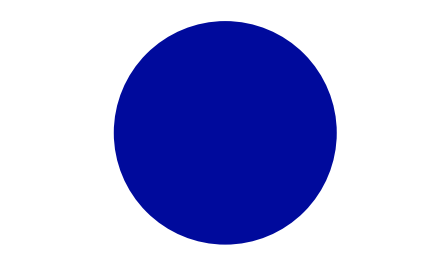

In [4]:
class Couleur:
    def __init__(self, R, G, B): #Complexité : O(1)
        self.R = float(R)
        self.G = float(G)
        self.B = float(B)
    
    @staticmethod
    def creerCouleur(listeRGB): #Complexité : O(1)
        return np.ndarray([listeRGB[0],listeRGB[1],listeRGB[2]])
        
    def getR(self): #Complexité : O(1)
        return self.R
    
    def getG(self): #Complexité : O(1)
        return self.G
    
    def getB(self): #Complexité : O(1)
        return self.B
        
    def brighter(self, pourcentage): #Complexité : O(1)
        R = self.getR() + (self.getR())*pourcentage
        G = self.getG() + (self.getG())*pourcentage
        B = self.getB() + (self.getB())*pourcentage
        return np.ndarray([R,G,B])
    
    def darker(self, pourcentage): #Complexité : O(1)
        R = (self.getR())*pourcentage
        G = (self.getG())*pourcentage
        B = (self.getB())*pourcentage
        return np.ndarray([R,G,B])
    
    def toString(self): #Complexité : O(1)
        return 'rgb('+str(self.getR())+','+str(self.getG())+','+str(self.getB())+')'
        
    
    def equals(self,color): #Complexité : O(1)
        return self.getR() == color.getR() and self.getG() == color.getG() and self.getB() == color.getB()
    
    def luminance(self): #Complexité : O(1)
        return 0.299*self.getR() + 0.587*self.getG() + 0.114*self.getB()
        
    
    def grayScale(self): #Complexité : O(1)
        l = int(self.luminance())
        return Couleur(l,l,l)
    
    def compatible(self,couleur): #Complexité : O(1)
        if((abs(self.luminance() - couleur.luminance())) <= 128):
            return True
        else:
            return False
        

    def add(self,color): #Complexité : O(1)
        R = (self.getR() + color.getR())/2
        G = (self.getG() + color.getG())/2
        B = (self.getB() + color.getB())/2
        return Couleur(R,G,B).toString()

    def showColor(self): #Complexité : O(1)
        fig, ax = plt.subplots()
        # create a grid to plot the color
        grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T
        # add a circle
        circle = mpatches.Circle(grid[0], 0.05, ec="none",color=(self.R/255,self.G/255,self.B/255))
        ax.add_patch(circle)
        #ax.add_line(line)

        plt.axis('equal')
        plt.axis('off')
        plt.tight_layout()

        plt.show()

a = Couleur(0,10,156)
a.showColor()

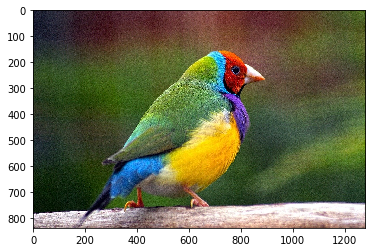

In [5]:
class Picture:
    def __init__(self,nomFichier = None,H = None, W = None): #Complexité : O(1)
        if nomFichier == None:
                
            self.H = H
            self.W = W
            self.img = np.zeros((H,W,3))
        else:
                
            self.img = mpimg.imread(nomFichier)
            self.H = self.img.shape[0]
            self.W = self.img.shape[1]
        
    
    def getH(self): #Complexité : O(1)
        return self.H
    
    def getW(self): #Complexité : O(1)
        return self.W
    
    def getImg(self): #Complexité : O(1)
        return self.img
    
    def getCouleur(self,row, col): #Complexité : O(1)
        R = self.getImg()[row,col,0]*255
        G = self.getImg()[row,col,1]*255
        B = self.getImg()[row,col,2]*255
        return np.ndarray([R,G,B]=
         
    
    def setCouleur(self,row, col,couleur): #Complexité : O(1)
        self.img[row,col,0] = couleur[0]/255
        self.img[row,col,1] = couleur[1]/255
        self.img[row,col,2] = couleur[2]/255
        
        
    def affiche(self): #Complexité : O(1)
        plt.imshow(self.img)
    
    def save(self, nomFichier): #Complexité : O(1)
        
        plt.imsave(nomFichier, self.img, format = 'png')


image_src = 'bird.png'
image = Picture(image_src)
image.affiche()
image.save('oiseau.png')

In [6]:
class ImageProcessing:
    
    def __init__(self,image): #Complexité : O(1)
        self.image = image
    '''
    Helper function
    '''
    def __calGray__(listePixel): #Complexité : O(1)
        A = math.floor(0.299*listePixel[0] + 0.587*listePixel[1] + 0.114*listePixel[2])
        return np.ndarray([A,A,A])
        
    '''
     Transformer en grayscale et visualiser l'image et sa transformée
     Appliquer les fonctions map, reduce ou filter pour reduire la complexite
    '''
    def transformGrayscaleMap(self): #Complexité : O(1)
        grayPicture = Picture(None,self.image.W,self.image.H)
        grayPicture.image = map(self.__calGray__(),self.image)
        return grayPicture
        
    '''
     Transformer en grayscale et visualiser l'image et sa transformée
     Une classe gloutonne avec des boucles for
    '''
    def transformGrayscaleGlouton(self): #Complexité : O(n²)
        image1_pixels = self.image.img
        nb_colonnes = len(image1_pixels[0,:,0])
        nb_lignes = len(image1_pixels[:,0,0])
        
        print("Résolution de l'image : " + str(nb_colonnes) + " x " + str(nb_lignes)) 
        
        for a in range(nb_lignes):
            for b in range(nb_colonnes):#3m*9
                Y = image1_pixels[a][b][0]*0.299 + image1_pixels[a][b][1]*0.587 + image1_pixels[a][b][2]*0.114
                image1_pixels[a][b][0],image1_pixels[a][b][1],image1_pixels[a][b][2] = Y,Y,Y
                
        plt.imsave("grayscale.png", image1_pixels, format = 'png')
        
        plt.imshow(image1_pixels)
                    
                 
        
    '''
     Creer une image en inversant les proportions de l'image source. Afficher les deux images
    '''
    def transformScale(self): #Complexité : O(1)
        image = self.image
        new_H = image.W
        new_W = image.H
        
        plt.figure(figsize=(30,20))
        
        plt.subplot(221)
        plt.imshow(image.img)
        plt.title("1280x838")
        
        plt.subplot(222)
        plt.imshow(image.img, extent=[0,new_W,0,new_H])
        plt.title("838x1280")
        plt.savefig("scaled.png", bbox_inches="tight", transparent="True")
        
        
    '''
    Separer les couleurs d'une image et visualiser les trois couleurs
    '''
    def separerCouleur(self): #Complexité : O(1)
        image = self.image.img
        
        red_only = image[:,:,0]
        green_only = image[:,:,1]
        blue_only = image[:,:,2]
        
        image1 = np.array([red_only, green_only*0, blue_only*0])
        image1 = np.swapaxes(image1, 0, 1)
        image1 = np.swapaxes(image1, 1, 2)
        
        image2 = np.array([red_only*0, green_only, blue_only*0])
        image2 = np.swapaxes(image2, 0, 1)
        image2 = np.swapaxes(image2, 1, 2)
        
        image3 = np.array([red_only*0, green_only*0, blue_only])
        image3 = np.swapaxes(image3, 0, 1)
        image3 = np.swapaxes(image3, 1, 2)
        
        plt.figure(figsize=(25,10))
        
        plt.subplot(241)
        plt.imshow(image)
        plt.title('Original')
        
        plt.subplot(242)
        plt.imshow(image1)
        plt.title('Red')
        
        plt.subplot(243)
        plt.imshow(image2)
        plt.title('Green')
        
        plt.subplot(244)
        plt.imshow(image3)
        plt.title('Blue')
        
        plt.imsave("red_channel.png", image1, format = 'png')
        plt.imsave("green_channel.png", image2, format = 'png')
        plt.imsave("blue_channel.png", image3, format = 'png')
        
        
    '''
    Filtre de glace: Affecter à chaque pixel p la couleur d'un pixel voisin choisi alétoirement
    (Les coordonnées du pixel et de p doivent différer d'au plus 5).
    Afficher les deux images 
    '''
    def filtreGlass(self): #Complexité : O(n²)
        image = self.image
        i = image.img
        sH = image.H - 5
        sW = image.W - 5
        subset = i[5:(sH),5:(sW)]
        
        start = time.time()
        
        for y in range(5,sH):
            for x in range(5,sW):
                ss = subset[(y-5):(y+5),(x-5):(x+5)]
                i[y][x] = Voisin_centre(ss).get_color()
        
        plt.imshow(i)
        
        end = time.time()
        
        print("Durée de l'opération : " + str(end-start) + "s")
        
        plt.imsave("filter_glass.png", i, format = 'png')
        
    def meanFilter(self,r): #Complexité : O(n^3)
        image = self.image
        i = image.img
        sH = image.H - r + 1
        sW = image.W - r + 1
        subset = i
        
        start = time.time()
        denom = ((1+r)*2-1)**2
        for y in range(r,sH):
            for x in range(r,sW):
                for w in range(3):
                    ss = subset[(y-r):(y+r+1),(x-r):(x+r+1),w]
                    somme = np.sum(ss)
                    
                    i[y][x][w] = somme/denom
                    #print(i[y][x][w])
                    
        sH = image.H
        sW = image.W
        for a in range(sH):
            if(a>=0 and a<r):
                lim_a_T = 0
                lim_a_B = a+r+1
            else:
                lim_a_T = a-r
                if((sH-a)<r):
                    lim_a_B = sH
                else:
                    lim_a_B = a+r+1
                    
            for b in range(sW):
                if(b>=0 and b<r):
                    lim_b_L = 0
                    lim_b_R = b+r+1
                else:
                    lim_b_L = b-r
                    if((sW-b)<r):
                        lim_b_R = sW
                    else:
                        lim_b_R = b+r+1
                    
                for w in range(3):
                    SS = subset[lim_a_T:lim_a_B,lim_b_L:lim_b_R,w]
                    Somme = np.sum(SS)
                    
                    i[a][b][w] = Somme/np.prod(SS.shape)
                    
                    
        
        plt.imshow(i)
        
        end = time.time()
        
        print(end-start)
        
        plt.imsave("mean_filter.png", i, format = 'png')
        
        
        
    
    def medianFilter(self,r): #Complexité : O(n^3)
        image = self.image
        i = image.img
        sH = image.H - r + 1
        sW = image.W - r + 1
        subset = i
        
        start = time.time()
        for y in range(r,sH):
            for x in range(r,sW):
                for w in range(3):
                    ss = subset[(y-r):(y+r+1),(x-r):(x+r+1),w]
                    i[y][x][w] = np.median(ss)
                    #print(i[y][x][w])
                    
        sH = image.H
        sW = image.W
        for a in range(sH):
            if(a>=0 and a<r):
                lim_a_T = 0
                lim_a_B = a+r+1
            else:
                lim_a_T = a-r
                if((sH-a)<r):
                    lim_a_B = sH
                else:
                    lim_a_B = a+r+1
                    
            for b in range(sW):
                if(b>=0 and b<r):
                    lim_b_L = 0
                    lim_b_R = b+r+1
                else:
                    lim_b_L = b-r
                    if((sW-b)<r):
                        lim_b_R = sW
                    else:
                        lim_b_R = b+r+1
                    
                for w in range(3):
                    SS = subset[lim_a_T:lim_a_B,lim_b_L:lim_b_R,w]
                    i[a][b][w] = np.median(SS)
                    
                    
        
        plt.imshow(i)
        
        end = time.time()
        
        print(end-start)
        
        plt.imsave("median_filter.png", i, format = 'png')
        
    
                    
    def mask(self,size, sigma): #Complexité : O(1)
        mask =  np.fromfunction(lambda x, y: (1/(2*math.pi*sigma**2)) * math.e ** ((-1*((x-(size-1)/2)**2+(y-(size-1)/2)**2))/(2*sigma**2)), (size, size))
        return mask / np.sum(mask)
    
    def gaussianFilter(self, r, sigma): #Complexité : O(n^3)
        img = self.image.img
        kernel = self.mask(r, sigma)
        d = int((r-1)/2)
        gaussian = np.zeros((img.shape[0]-2*d, img.shape[1]-2*d,3))
        for y in range(d, img.shape[0]-d):
            for x in range(d, img.shape[1]-d):
                for w in range(3):
                    gaussian[y-d][x-d][w] = np.sum(np.multiply(img[(y-d):(y+d+1), (x-d):(x+d+1),w], kernel))
                    #print(gaussian[y-d][x-d])
        plt.imshow(gaussian)
        plt.imsave("gauss_filter.png", gaussian, format = 'png')
        
    
    def crimminsFilter(self,r):n^4
        image = self.image
        i = image.img
        sH = image.H - r + 1
        sW = image.W - r + 1
        subset = i
        
        start = time.time()
        for y in range(r,sH,r+1):
            for x in range(r,sW,r+1):
                for w in range(3):
                    ss = subset[(y-r):(y+r+1),(x-r):(x+r+1),w]
                    for a in ss:
                        ss[i[y][x][w]>=ss+0.02] +=0.01
                        ss[i[y][x][w]<=ss-0.02] -=0.01
                    i[(y-r):(y+r+1),(x-r):(x+r+1),w] = ss
                    
#                    print(ss[ss>=a-0.2])
                    
                    
        
        plt.imshow(i)
        
        end = time.time()
        
        print(end-start)
        
        plt.imsave("crimmins_filter.png", i, format = 'png')
    
    
    def conservativeFilter(self,r): #Complexité : O(n^3)
        image = self.image
        i = image.img
        sH = image.H - r + 1
        sW = image.W - r + 1
        subset = i
        
        start = time.time()
        for y in range(r,sH):
            for x in range(r,sW):
                for w in range(3):
                    ss = subset[(y-r):(y+r+1),(x-r):(x+r+1),w]
                    mini = np.amin(ss)
                    maxi = np.amax(ss)
                    if(i[y][x][w]<mini):
                        i[y][x][w] = mini
                    elif(i[y][x][w]>maxi):
                        i[y][x][w] = maxi
                    else:
                        pass
                    #print(i[y][x][w])
                    
                    
        
        plt.imshow(i)
        
        end = time.time()
        
        print(end-start)
        
        plt.imsave("conservative_filter.png", i, format = 'png')
        
    
class Voisin_centre:
    def __init__(self, subset): #Complexité : O(1)
        self.subset = subset
        
    def get_color(self): #Complexité : O(1)
        return random.choice(random.choice(self.subset))
    

image1 = Picture('bird.png')

Résolution de l'image : 1280 x 838


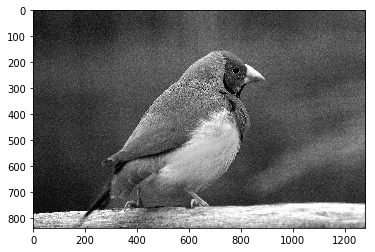

In [7]:
ImageProcessing(image1).transformGrayscaleGlouton()

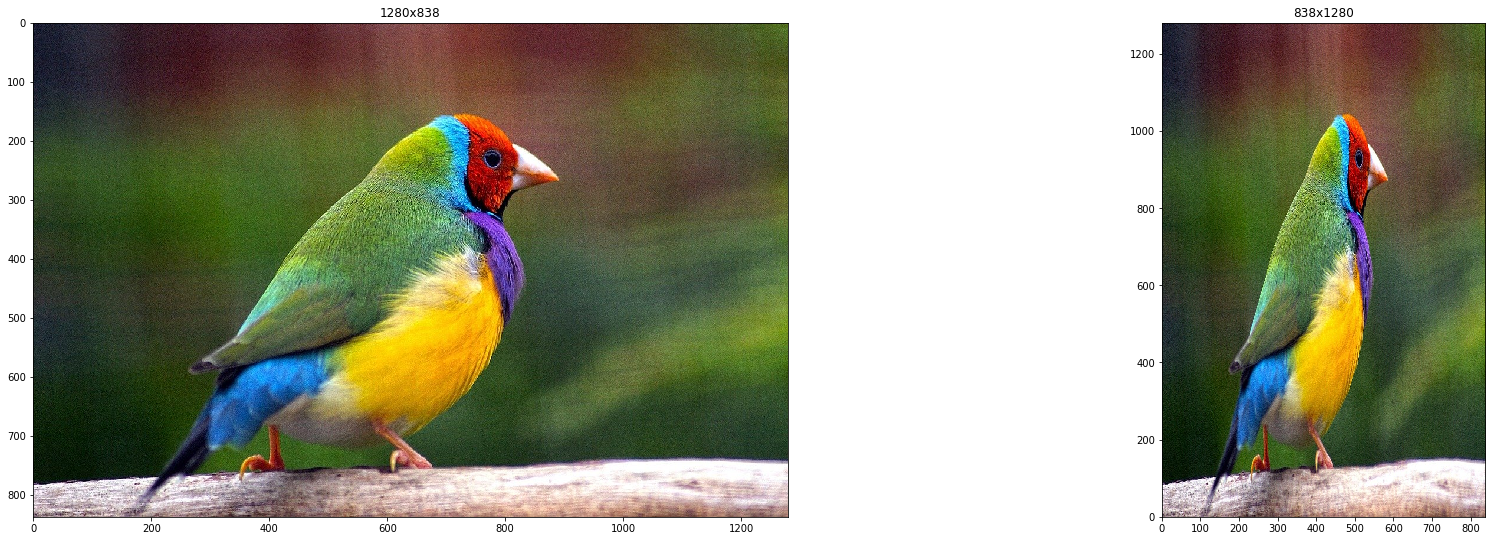

In [28]:
ImageProcessing(image1).transformScale()

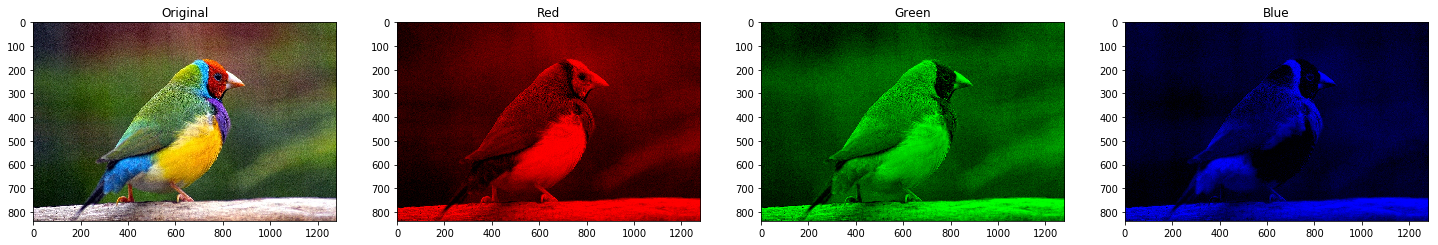

In [18]:
ImageProcessing(image1).separerCouleur()

Durée de l'opération : 12.9630000591s


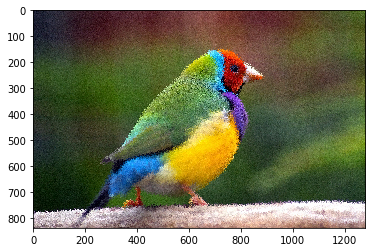

In [9]:
ImageProcessing(image1).filtreGlass()

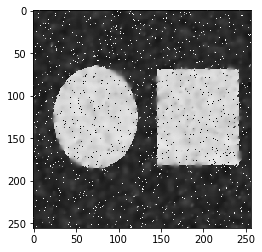

22.8970000744


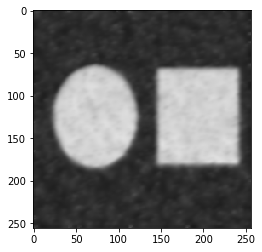

In [8]:
image2 = Picture('bruit1.png')
image2.affiche()
plt.show()
ImageProcessing(image2).meanFilter(2)

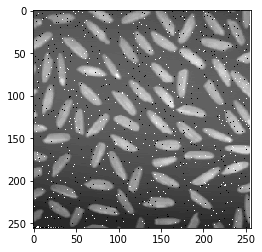

73.001999855


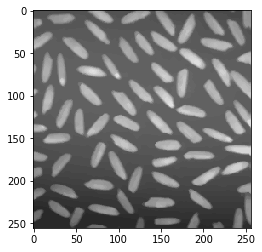

In [11]:
image3 = Picture("bruit4.png")
image3.affiche()
plt.show()
ImageProcessing(image3).medianFilter(1)

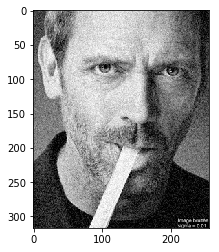

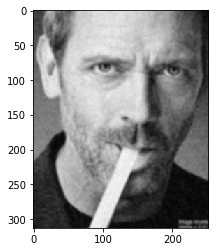

In [14]:
image4 = Picture("bruit3.png")
image4.affiche()
plt.show()
ImageProcessing(image4).gaussianFilter(5, 1.5)

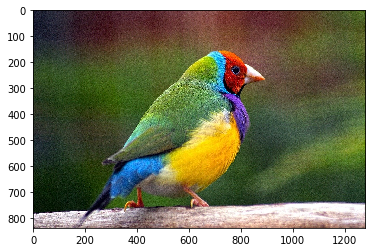

164.975999832


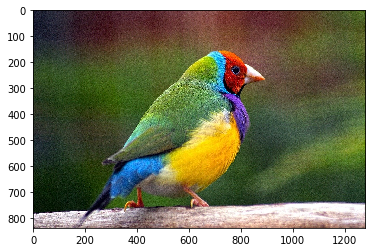

In [12]:
image5 = Picture("bird.png")
image5.affiche()
plt.show()
ImageProcessing(image5).conservativeFilter(5)

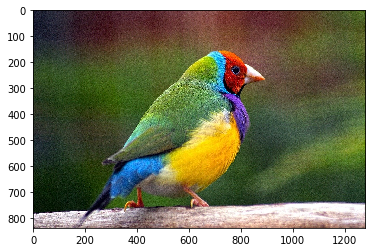

43.3830001354


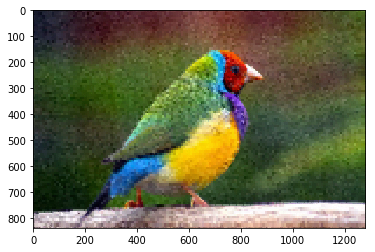

In [19]:
image6 = Picture("bird.png")
image6.affiche()
plt.show()
ImageProcessing(image6).crimminsFilter(8)